Playing around with the neuron responses to OU stochastic currents

Things to study (with/out autapse): 

    - correlations between the membrane potential and the driving current. 

    - robustness to noise above the firing threshold. Track frequency over time for different autapse strengths.

    - what do spikes represent? How do different statistics of the input affect the output?

In [ ]:
#imports for AQUA
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
from scipy.ndimage import gaussian_filter
from tqdm import tqdm

import seaborn as sns
sns.set_theme(style = "white")

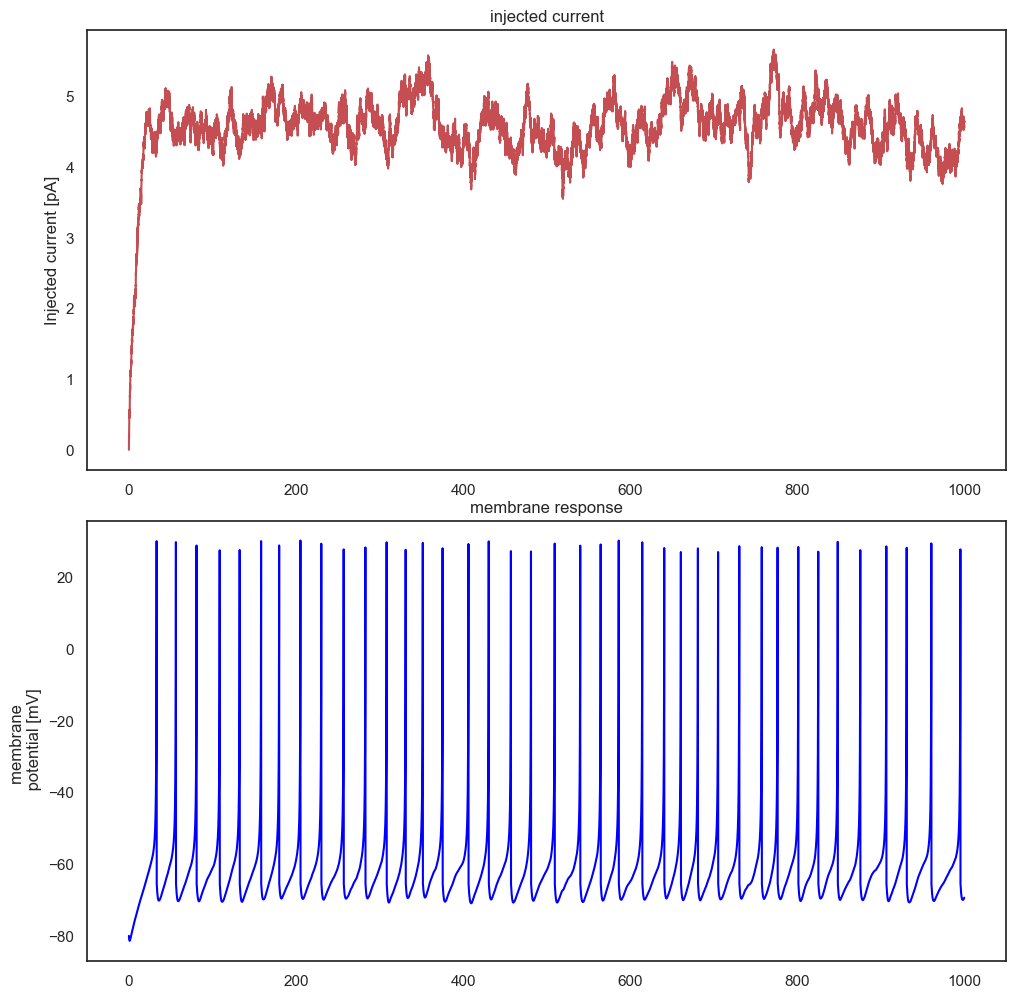

In [ ]:
# Simulate the neurons response to an OU stochastic driving current.

#params
IB = {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50,
     'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0., 'f': 0., 'tau': 0.}


# simulation parameters
T = 1000      # ms
dt = 0.01     # ms
N_iter = int(T/dt)


# initial conditions
x_start = np.array([-80, 0, 0])
t_start = np.array([0])


# Stimulus and OU params
y_0 = 0
THETA = 0.1         # rate of mean reversion
MU = 4.5              # mean value of current
SIGMA = 0.15        # noise amplitude


I_inj = OU_current(N_iter, dt, y_0, THETA, MU, SIGMA)

neuron = AQUA(a, b, c, d, e, f, tau)
neuron.Initialise(x_start, t_start)

X, T, spike_times = neuron.update_RK2(dt, N_iter, I_inj)

fig, ax = plot_potential_versus_injected(X, T, I_inj)
plt.show()

